In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.layers.core import Activation

import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from keras.optimizer_v2.adam import Adam

from sklearn.metrics import classification_report,confusion_matrix

import pandas as pd


import cv2
import os

import numpy as np


import pickle
import time
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')
root = 'drive/My Drive/Colab Notebooks/'
reda_root = 'drive/My Drive/TFG/'
paht = 'drive/My Drive/Colab Notebooks/fakkedit/'

Mounted at /content/drive


In [58]:
!tar -xvf '/content/drive/MyDrive/TFG/public_images.tar.bz2' -C /content/

public_image_set/
public_image_set/drnrw1b.jpg
public_image_set/buy77u.jpg
public_image_set/ddkp07.jpg
public_image_set/29u7tg.jpg
public_image_set/da0denw.jpg
public_image_set/4vsjot.jpg
public_image_set/awl8my.jpg
public_image_set/4ottor.jpg
public_image_set/bcrxmh.jpg
public_image_set/cg0e1a.jpg
public_image_set/cpz88yv.jpg
public_image_set/8ymdkm.jpg
public_image_set/vluop.jpg
public_image_set/6p6dgu.jpg
public_image_set/1ekb7c.jpg
public_image_set/5mg4hb.jpg
public_image_set/dein9p.jpg
public_image_set/124siw.jpg
public_image_set/be5lpq.jpg
public_image_set/2y95zk.jpg
public_image_set/4worvs.jpg
public_image_set/5ma6se.jpg
public_image_set/ch4plwa.jpg
public_image_set/cj7t95h.jpg
public_image_set/c5zbdea.jpg
public_image_set/c70rzwq.jpg
public_image_set/2p06pa.jpg
public_image_set/cnwmq27.jpg
public_image_set/cmwj1ag.jpg
public_image_set/chj7w3.jpg
public_image_set/8enfor.jpg
public_image_set/8yf64b.jpg
public_image_set/2512ev.jpg
public_image_set/8bv8us.jpg
public_image_set/23hsu

In [59]:
%cd /content/public_image_set

/content/public_image_set


In [60]:
!ls -l | awk '{print $9}' | awk -F  "." '{print $1}' | sed '1d' | sed '1i id' >> ../images.csv

In [61]:
MULTIMODAL_ONLY = True # if False, we will load all the
nameFile = 'multimodal_'
if not MULTIMODAL_ONLY:
    nameFile ='all_'
TYPE_CLASSIFICATION = 6 # 2, 3 OR 6

In [62]:
%cd /content

/content


In [63]:
import pandas as pd
train = pd.read_csv(reda_root+"data/fakeddit/" + nameFile+ "train.tsv", sep='\t')
val  = pd.read_csv(reda_root+"data/fakeddit/" + nameFile+ "validate.tsv", sep='\t')
test  = pd.read_csv(reda_root+"data/fakeddit/" + nameFile+ "test_public.tsv", sep='\t')
images = pd.read_csv('images.csv')

print("Dataset: ", nameFile)
print('size training: ', len(train))
print('size validation: ', len(val))
print('size test: ', len(test))
print('size images directory: ', len(images))


Dataset:  multimodal_
size training:  564000
size validation:  59342
size test:  59319
size images directory:  6342


In [64]:
images

,id
0,124siw
1,17rwbm
2,19cokm
3,19jjqy
4,1crdz7
...,...
6337,yh5rh
6338,zafyi
6339,zjroh
6340,zsjkk


In [65]:
all = pd.concat([train, val, test])
all

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,Alexithymia,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0
1,VIDCAs17,this concerned sink with a tiny hat,1.534727e+09,i.redd.it,True,98pbid,https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...,NaN,2.0,119,pareidolia,This concerned sink with a tiny hat,0.99,0,2,2
2,prometheus1123,hackers leak emails from uae ambassador to us,1.496511e+09,aljazeera.com,True,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...,NaN,1.0,44,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,1,0,0
3,NaN,puppy taking in the view,1.471341e+09,i.imgur.com,True,4xypkv,https://external-preview.redd.it/HLtVNhTR6wtYt...,NaN,26.0,250,photoshopbattles,PsBattle: Puppy taking in the view,0.95,1,0,0
4,3rikR3ith,i found a face in my sheet music too,1.525318e+09,i.redd.it,True,8gnet9,https://preview.redd.it/ri7ut2wn8kv01.jpg?widt...,NaN,2.0,13,pareidolia,I found a face in my sheet music too!,0.84,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59314,lazarus30d,bicycle taxi drivers of new delhi,1.352463e+09,flickr.com,True,12wreq,https://external-preview.redd.it/mWhXZymnupI3a...,NaN,0.0,4,pic,Bicycle taxi drivers of New Delhi,0.64,1,0,0
59315,Sewblon,trump blows up gops formula for winning house ...,1.533888e+09,politico.com,True,9650zw,https://external-preview.redd.it/1uLpjM1bd_vA-...,NaN,1.0,2,neutralnews,Trump blows up GOP's formula for winning House...,0.58,1,0,0
59316,Lifewillbelife,napoleon returns from his exile on the island ...,1.521720e+09,i.redd.it,True,86ax7x,https://preview.redd.it/fuzkuzxt0bn01.png?widt...,NaN,0.0,45,fakehistoryporn,Napoleon returns from his exile on the island ...,0.98,0,2,2
59317,LordCamembert,deep down he always wanted to be a ballet dancer,1.366567e+09,NaN,True,c9jq15h,http://i.imgur.com/otCWbOt.jpg,1cssa3,NaN,141,psbattle_artwork,Deep down he always wanted to be a ballet dancer,NaN,0,2,4


In [66]:
df_with_photo = all.merge(images, on='id')
df_with_photo

,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,otgw7,happy plum,1.512920e+09,i.redd.it,True,7iugi8,https://preview.redd.it/6ymktbvv44301.jpg?widt...,NaN,0.0,3,pareidolia,Happy plum,0.72,0,2,2
1,otgw7,happy plum,1.512920e+09,i.redd.it,True,7iugi8,https://preview.redd.it/6ymktbvv44301.jpg?widt...,NaN,0.0,3,pareidolia,Happy plum,0.72,0,2,2
2,MTV_Cats,this bowl has a built in chopstick holder,1.567283e+09,i.redd.it,True,cy0ff9,https://preview.redd.it/3s6xzjhaguj31.jpg?widt...,NaN,15.0,100,mildlyinteresting,This bowl has a built in chopstick holder,0.92,1,0,0
3,MTV_Cats,this bowl has a built in chopstick holder,1.567283e+09,i.redd.it,True,cy0ff9,https://preview.redd.it/3s6xzjhaguj31.jpg?widt...,NaN,15.0,100,mildlyinteresting,This bowl has a built in chopstick holder,0.92,1,0,0
4,pcmasterrace_SS,whats the best laptop i had to make my own pc,1.475932e+09,rockpapershotgun.com,True,56gu9j,https://external-preview.redd.it/BH-bHNshJOAG7...,NaN,20.0,7,subredditsimulator,What's the best laptop I had to make my own PC?,0.82,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5631,Momzadork24,glitter girl,1.518199e+09,i.imgur.com,True,7wf85n,https://external-preview.redd.it/c63rSult_CLoF...,NaN,6.0,7,photoshopbattles,PsBattle: Glitter Girl,0.68,1,0,0
5632,jelaagc,this swiss coke bottle with zero sugar printed...,1.563518e+09,i.redd.it,True,cf44ep,https://preview.redd.it/4vraqzerg7b31.jpg?widt...,NaN,3.0,4,mildlyinteresting,This Swiss Coke bottle with zero sugar printed...,0.67,1,0,0
5633,jelaagc,this swiss coke bottle with zero sugar printed...,1.563518e+09,i.redd.it,True,cf44ep,https://preview.redd.it/4vraqzerg7b31.jpg?widt...,NaN,3.0,4,mildlyinteresting,This Swiss Coke bottle with zero sugar printed...,0.67,1,0,0
5634,youngstersamuel,magnets in the frame and headphones easy access,1.552339e+09,i.redd.it,True,azyuca,https://preview.redd.it/m9q501ha2kl21.jpg?widt...,NaN,6.0,8,mildlyinteresting,"Magnets in the frame and headphones, easy access.",0.78,1,0,0


In [67]:
traindata_all, validata_all, testdata_all = np.split(df_with_photo.sample(frac=1, random_state=12345), [int(.6*len(df_with_photo)), int(.8*len(df_with_photo))])
print('size training: ', len(traindata_all))
print('size validation: ', len(validata_all))
print('size test: ', len(testdata_all))

size training:  3381
size validation:  1127
size test:  1128


In [68]:
reduction = 2 #100, 10 or 1

print("reduction applied: ", reduction)


print(f"Training patterns before reduction: {len(traindata_all)}")
traindata_all = traindata_all.sample(int(len(traindata_all)/reduction), random_state=12345)
print(f"Training patterns after reduction:  {len(traindata_all)}")

print(f"Validation patterns before reduction: {len(validata_all)}")
validata_all = validata_all.sample(int(len(validata_all)/reduction), random_state=12345)
print(f"Validation patterns after reduction:  {len(validata_all)}")

print(f"Test patterns before reduction: {len(testdata_all)}")
testdata_all = testdata_all.sample(int(len(testdata_all)/reduction), random_state=12345)
print(f"Test patterns after reduction:  {len(testdata_all)}")

reduction applied:  2
Training patterns before reduction: 3381
Training patterns after reduction:  1690
Validation patterns before reduction: 1127
Validation patterns after reduction:  563
Test patterns before reduction: 1128
Test patterns after reduction:  564


In [69]:
%cd /content/

/content


In [70]:
img_size = 224
def get_data(source, path, limit = -1):
    iter = 0
    x = [] 
    y = []
    for index, row in source.iterrows():
        iter+= 1
        if iter == limit:
            break
        try:
            img = row['id'] + '.jpg'
            class_num = row[str(TYPE_CLASSIFICATION) +'_way_label']
            print('[' + str(index) + ']' + ' Trying img = ' + img + ' with class = ' + str(class_num) + ' for type = ' + str(TYPE_CLASSIFICATION))
            img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            x.append(resized_arr / 255)
            y.append(class_num)
        except Exception as e:
           print(e)
           print('Error in row ' + str(index) + ' for image named ' + img)
    return np.array(x), np.array(y)

In [71]:
# Now we can easily fetch our train and validation data.
x_train, y_train = get_data(traindata_all, './public_image_set', -1)
x_val, y_val = get_data(validata_all, './public_image_set', -1)

[4317] Trying img = chc53a.jpg with class = 0 for type = 6
[4184] Trying img = 4pb28w.jpg with class = 5 for type = 6
[3953] Trying img = 4wwob0.jpg with class = 0 for type = 6
[1539] Trying img = 8yf64b.jpg with class = 0 for type = 6
[2670] Trying img = 6e8c8f.jpg with class = 2 for type = 6
[245] Trying img = 1unuxb.jpg with class = 0 for type = 6
[4654] Trying img = 4i44ae.jpg with class = 0 for type = 6
[2900] Trying img = cq19ltg.jpg with class = 4 for type = 6
[1573] Trying img = 2tgvpg.jpg with class = 0 for type = 6
[4169] Trying img = 7xnhhe.jpg with class = 1 for type = 6
[1479] Trying img = d9m6x4t.jpg with class = 4 for type = 6
[3309] Trying img = 68sqkq.jpg with class = 2 for type = 6
[780] Trying img = czd5ysp.jpg with class = 4 for type = 6
[2043] Trying img = cmmpvd.jpg with class = 5 for type = 6
[4593] Trying img = b39n4v.jpg with class = 2 for type = 6
[2346] Trying img = d40si94.jpg with class = 4 for type = 6
[2376] Trying img = 33jssv.jpg with class = 0 for type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


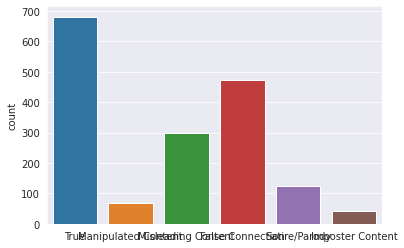

In [72]:
l = []
for i in y_train:
    if(i == 0):
        l.append("True")
    elif(i == 1):
        l.append("Satire/Parody")
    elif(i == 2):
        l.append("Misleading Content")
    elif(i == 3):
        l.append("Imposter Content")
    elif(i == 4):
        l.append("False Connection")
    elif(i == 5):
        l.append("Manipulated Content")
sns.set_style('darkgrid')
sns.countplot(l)

Imposter content has a lower number examples so we need to balance the data 
(pendiente)

In [73]:
#x_train.reshape(-1, img_size, img_size, 1)
#x_val.reshape(-1, img_size, img_size, 1)

In [74]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
# Creating a Sequential model
print("x_train samples: ", x_train.shape)
print("x_validation samples: ", x_val.shape)

# Train Generator
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                    rotation_range=30,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip='true')

train_generator = train_datagen.flow(x_train, y_train, shuffle=False, batch_size=40, seed=42)

# Validation Generator
val_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = val_datagen.flow(x_val, y_val, shuffle=False, batch_size=40, seed=42)


# Model Intialize
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(512, activation='relu')(x)
predictions = Dense(TYPE_CLASSIFICATION, activation = 'softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(Adam(lr=.0001), loss= 'sparse_categorical_crossentropy', metrics=['acc'])

# Train the model
start = time.time()
history = model.fit(train_generator,
                    steps_per_epoch=len(x_train) // 40,
                    validation_data=val_generator,
                    epochs=5,
                    verbose=2)
end = time.time()
print("\nTotal Time Taken:", round((end - start) / 60, 2), "Minutes")

try:
    file = open("multi_class_model.pkl", "wb")
    pickle.dump(model, file)
    print("Model Saved..!!")
    
except Exception as e:
    print(str(e))



x_train samples:  (1689, 224, 224, 3)
x_validation samples:  (563, 224, 224, 3)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/5
42/42 - 32s - loss: 1.3380 - acc: 0.4773 - val_loss: 1.7083 - val_acc: 0.4067 - 32s/epoch - 760ms/step
Epoch 2/5
42/42 - 22s - loss: 0.8342 - acc: 0.7071 - val_loss: 1.5766 - val_acc: 0.4050 - 22s/epoch - 529ms/step
Epoch 3/5
42/42 - 22s - loss: 0.5287 - acc: 0.8411 - val_loss: 1.6092 - val_acc: 0.4032 - 22s/epoch - 526ms/step
Epoch 4/5
42/42 - 22s - loss: 0.3250 - acc: 0.8963 - val_loss: 1.6847 - val_acc: 0.3286 - 22s/epoch - 531ms/step
Epoch 5/5


In [ ]:
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

In [ ]:
history_dict = history.history
print(history_dict.keys())

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()